In [1]:
using CSV,TimeZones,Dates,PlotlyJS

WebIO._IJuliaInit()

In [2]:
rows = CSV.File("/home/sharath/Downloads/results.csv";)
tuples = collect(Tuple.(rows))

1309-element Vector{Tuple{String31, String15, Float64}}:
 ("2025-06-24 12:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 07:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 00:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 03:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 01:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 04:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 09:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 02:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 14:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 06:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 13:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 15:00:00.000000 UTC", "0", 0.0)
 ("2025-06-24 10:00:00.000000 UTC", "0", 0.0)
 ⋮
 ("2025-07-31 01:00:00.000000 UTC", "1,392,957.36", 0.0)
 ("2025-08-13 01:00:00.000000 UTC", "1,399,523.06", 0.0)
 ("2025-08-11 01:00:00.000000 UTC", "1,407,610.62", 0.0)
 ("2025-08-14 01:00:00.000000 UTC", "1,424,004.74", 0.0)
 ("2025-08-15 01:00:00.000000 UTC", "1,434,563.93", 0.0)
 ("2025-08-01 01:00:00.000000 UTC", "1,439,299.65", 0.0)


In [3]:
t :: Vector{Tuple{ZonedDateTime, Float64}} = []
for row in tuples
    s = row[1]

    # Step 1: strip off " UTC" and parse into DateTime
    dt = DateTime(replace(s, " UTC" => ""),
                  dateformat"yyyy-mm-dd HH:MM:SS.ssssss")
    
    # Step 2: wrap into ZonedDateTime with UTC timezone
    zdt = ZonedDateTime(dt, tz"UTC")

    ss = replace(row[2], "," => "")
    push!(t, (zdt, parse(Float64, ss)))
end

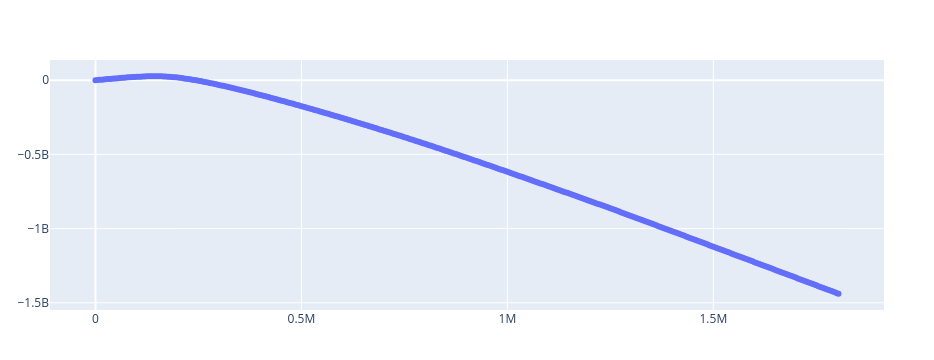

In [9]:
# loop over IDR 0(min) to 1800000(max) with a step of IDR 5000
cud_range = vcat(collect(0:5000:1800000.0), 1803955.74)
u :: Vector{Tuple{Float64, Float64}} = []
for cud in cud_range
    savings = 0.0
    for row in t
        cost = row[2]
        newCost = cud*0.8 + max(0, cost-cud)
        savings += cost - newCost
    end
    push!(u, (cud, savings))
end
xs = [p[1] for p in u]
ys = [p[2] for p in u]
plt = Plot(
    scatter(x=xs, y=ys, mode="lines+markers", name="line chart")
)

display(plt)


In [11]:
a = (1, 2, 3)
a[1]=7

LoadError: MethodError: no method matching setindex!(::Tuple{Int64, Int64, Int64}, ::Int64, ::Int64)
The function `setindex!` exists, but no method is defined for this combination of argument types.